In [1]:
import skrf as rf
from skrf.media import Coaxial
from skrf.data import ring_slot
import matplotlib.pyplot as plt
rf.stylely()

In [2]:
# Define 1001 frequency points in [0.11, 110]
freq = rf.F(0.11,110,1001)

# Define coaxial transmission line
coax1mm = Coaxial(freq, z0=50, Dint=0.44e-3, Dout=1.0e-3, sigma=1e20)

In [4]:
X = coax1mm.line(10, 'mm', z0=50, name='X', embed=True)
Y = coax1mm.line(80, 'mm', z0=75, name='Y', embed=True)
dut = X**Y**X
dut.name = 'Original'

dut_dc = dut.extrapolate_to_dc(dc_sparam=[[0,1],[1,0]], kind='cubic')

In [7]:
# Export network to Touchstone file
dut_dc.write_touchstone()

/Users/bon/opt/anaconda3/lib/python3.9/site-packages/skrf/network.py:3704: RuntimeWarning: Frequency doesn't begin from 0. Step response will not be correct.
  warnings.warn(


Text(0.5, 0, 'Time (ns)')

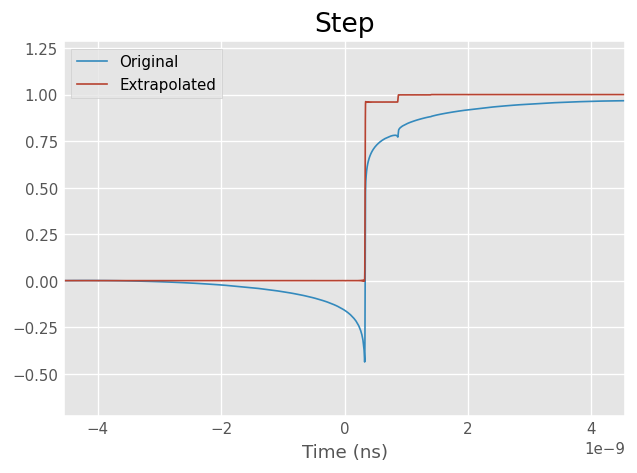

In [13]:
plt.figure()
plt.title('Step')
t1, y1 = dut.s21.step_response()
t2, y2 = dut_dc.s21.step_response()
plt.plot(t1, y1, label='Original')
plt.plot(t2, y2, label='Extrapolated')
plt.legend()
plt.xlabel('Time (ns)')

In [ ]:
# Calling network parameter is equivalent to printing out short description of the network
ring_slot

In [ ]:
# Can view whole s-parameter entries for each freq. point
ring_slot.s

In [ ]:
# Accessing only single freq. point of s-parameters
ring_slot.s[0]

In [ ]:
ring_slot.a

In [ ]:
short = rf.data.wr2p2_short
line = 

In [ ]:
short
# delayshort

In [ ]:
# More elegant style?!
rf.stylely()

# Can draw Smith chart for given network
ring_slot.plot_s_smith()

In [ ]:
# Can draw whole dB-GHz plot for whole freq. range
ring_slot.plot_s_db()

In [ ]:
ring_slot.step_response()